# Guided Project: Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

# Load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [6]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned.

# Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [8]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

* We see participants in the survey can be interested in more than one job role at once.
* A lot of people are interested in web development

It is interesting to see that many people are interested in more than one area. Let us work out how many people are interested in more than one area.

In [10]:
#drop nas
interests = survey['JobRoleInterest'].dropna()

#split strings
interests_list = interests.str.split(',')

#value counts of number of interests
n_interests = interests_list.apply(lambda x:len(x))
n_interests.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of students have a clear idea of what they want to do. Given we offer a variety of courses, new students having mixed interests may be a positive thing.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

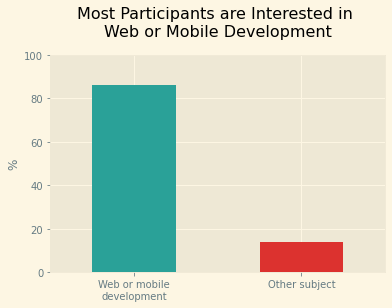

In [27]:
web_or_mobile = interests.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100

%matplotlib inline
plt.style.use('Solarize_Light2')
freq_table.plot.bar(color=['#2aa198','#dc322f'])
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylabel('%',size=12)
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.06)
plt.ylim(0,100)
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

# Locations of New Coders

In [32]:
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

abs_freq = survey_clean['CountryLive'].value_counts()
rel_freq = survey_clean['CountryLive'].value_counts(normalize=True)*100

locations = pd.DataFrame(data = {'Absolute frequency': abs_freq, 
                     'Percentage': rel_freq}
            )
locations

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


45.7% of potential customers are located in the USA, which seems like the most interesting market. India proves to be the second biggest proportion of respondents, but the UK and Canada are not far behind.

We found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending habits

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. 

In [34]:
# Replace 0s with 1s to avoid division by 0
survey_clean['MonthsProgramming'].replace(0,1, inplace = True)

#monthly spend column
survey_clean['monthly_spend'] = survey_clean['MoneyForLearning']/survey_clean['MonthsProgramming']

#NAs
survey_clean['monthly_spend'].isnull().sum()

675

In [36]:
#Drop nas
survey_clean = survey_clean[survey_clean['monthly_spend'].notnull()]
survey_clean = survey_clean[survey_clean['CountryLive'].notnull()]

In [38]:
countries_mean = survey_clean.groupby('CountryLive').mean()
countries_mean['monthly_spend'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_spend, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Search for outliers

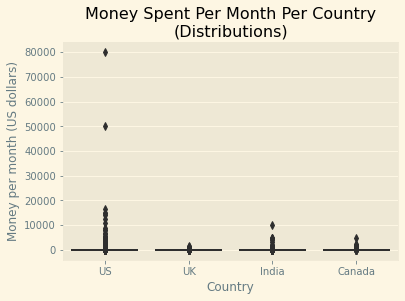

In [39]:
countries = survey_clean[survey_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y='monthly_spend',x='CountryLive',data=countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two people spend \\$50,000 or more per month for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

In [41]:
countries = countries[countries['monthly_spend']< 20000] 

In [42]:
countries_mean = countries.groupby('CountryLive').mean()
countries_mean['monthly_spend']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: monthly_spend, dtype: float64

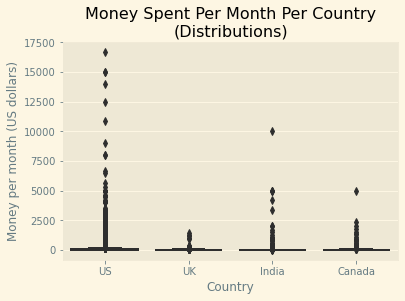

In [43]:
sns.boxplot(y='monthly_spend',x='CountryLive',data=countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There's a few values quite high for India (>\\$2500). Maybe these people attended bootcamps.

In [45]:
india_outliers = countries[
    (countries['CountryLive'] == 'India') & 
    (countries['monthly_spend'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems none of these people attended a bootcamp. It is difficult to determine whether these people really spent that much on learning. It seems safer to remove these rows for now.

In [46]:
countries = countries.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \\$6000 per month). Let's examine these participants in more detail.

In [50]:
us_outliers = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['monthly_spend'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Let us remove respondents who didn't attend a bootcamp.

In [51]:
no_bootcamp =  countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['monthly_spend'] >= 6000) &
    (countries['AttendedBootcamp']==0)
]
countries = countries.drop(no_bootcamp.index)

Finally, Canada has a person who has spent over \\$5000 a month on learning.

In [55]:
canada_outlier = countries[
    (countries['CountryLive']=='Canada') &
    (countries['monthly_spend']>=5000)
]
canada_outlier[['AttendedBootcamp','MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
13659,1.0,2.0


They have attended a bootcamp, for which they will have forked out a large sum of money. However they have only been programming for 2 months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). Thus we will remove this point.

In [56]:
countries = countries.drop(canada_outlier.index)

We can do the same for USA participants, who have programmed for less than 3 months, for the same reasoning.

In [57]:
less_than_3 = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['monthly_spend'] >= 6000) &
    (countries['MonthsProgramming']<=3)
]
countries = countries.drop(less_than_3.index)

In [58]:
countries.groupby('CountryLive').mean()['monthly_spend']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: monthly_spend, dtype: float64

# Choosing the best two countries

Naturally we will want to advertise in the US. They have the biggest potential customer base, and are willing to spend the most per month.

The data also suggests we shouldn't bother advertising in the UK.

There is an interesting decision to be made between Canada and India. Canadians are willing to spend more per month than their Indian counterparts (\\$93 vs \\$66), but there is a caveat here. Our subscription is only \\$59 monthly, and the customer base for India is significantly larger.

At the end of the day, we could choose to advertise in 3 countries rather than two. Whatever our decision, we would likely look to spend more in the US than the other country/countries.

It seems like a good idea to forward our findings to a marketing team, who can use their specialist domain knowledge to make the final decision.